# Import Libraries

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [ ]:
! kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 99% 147M/149M [00:00<00:00, 262MB/s]
100% 149M/149M [00:00<00:00, 247MB/s]


# Store dataset in a DataFrame

In [ ]:
def get_class_paths(path):
  classes = []
  class_path = []

  # Iterate through directories in the training path
  for label in os.listdir(path):
    label_path = os.path.join(path, label)

    # Check if it's a directory
    if os.path.isdir(label_path):
      # Iterate through images in the label directory
      for image in os.listdir(label_path):
        image_path = os.path.join(label_path, image)

        # Add class and path to respective lists
        classes.append(label)
        class_path.append(image_path)

    # Create a DataFrame with the collected data
    df = pd.DataFrame({'Class': classes, 'Path': class_path})

  return df

In [ ]:
tr_df = get_class_paths('/content/Training')

In [ ]:
tr_df

,Class,Path
0,meningioma,/content/Training/meningioma/Tr-me_0358.jpg
1,meningioma,/content/Training/meningioma/Tr-me_0781.jpg
2,meningioma,/content/Training/meningioma/Tr-me_1261.jpg
3,meningioma,/content/Training/meningioma/Tr-me_0195.jpg
4,meningioma,/content/Training/meningioma/Tr-me_0495.jpg
...,...,...
5707,notumor,/content/Training/notumor/Tr-no_0019.jpg
5708,notumor,/content/Training/notumor/Tr-no_0635.jpg
5709,notumor,/content/Training/notumor/Tr-no_1126.jpg
5710,notumor,/content/Training/notumor/Tr-no_0897.jpg


In [ ]:
ts_df = get_class_paths('/content/Testing')

In [ ]:
ts_df

,Class,Path
0,meningioma,/content/Testing/meningioma/Te-me_0132.jpg
1,meningioma,/content/Testing/meningioma/Te-me_0054.jpg
2,meningioma,/content/Testing/meningioma/Te-me_0182.jpg
3,meningioma,/content/Testing/meningioma/Te-me_0235.jpg
4,meningioma,/content/Testing/meningioma/Te-me_0241.jpg
...,...,...
1306,notumor,/content/Testing/notumor/Te-no_0082.jpg
1307,notumor,/content/Testing/notumor/Te-no_0346.jpg
1308,notumor,/content/Testing/notumor/Te-no_0039.jpg
1309,notumor,/content/Testing/notumor/Te-no_0270.jpg


# Visualize Class Balance

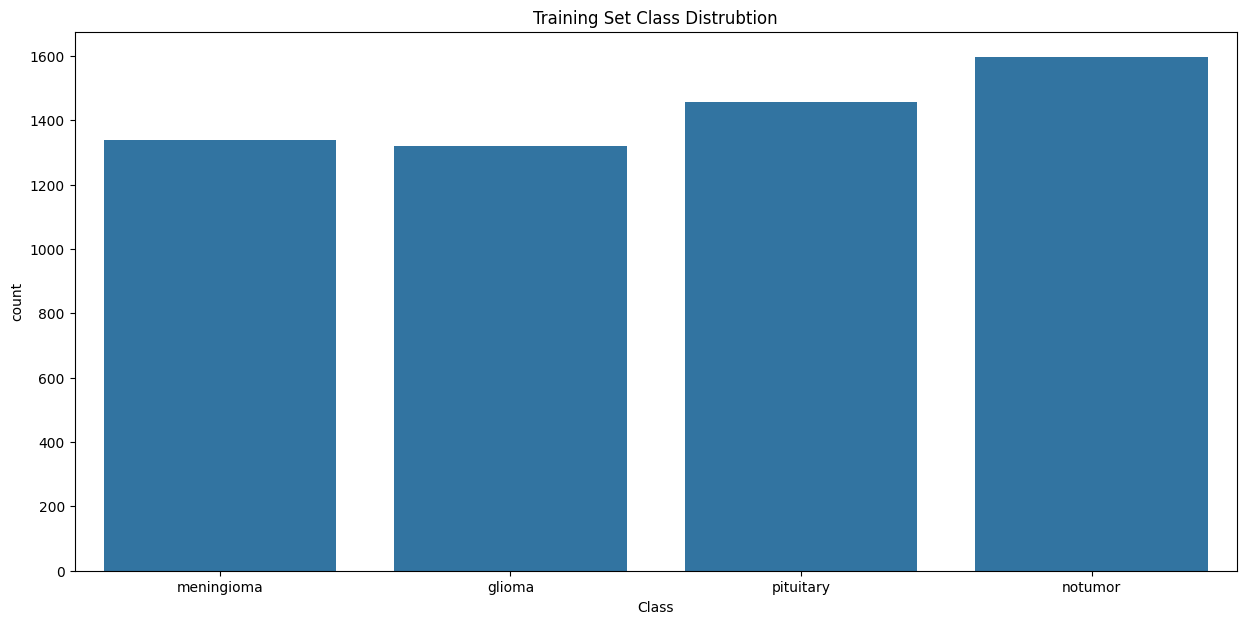

In [ ]:
plt.figure(figsize=(15,7))
plt.title('Training Set Class Distrubtion')
ax = sns.countplot(x='Class', data=tr_df)

*A fairly balanced training set*

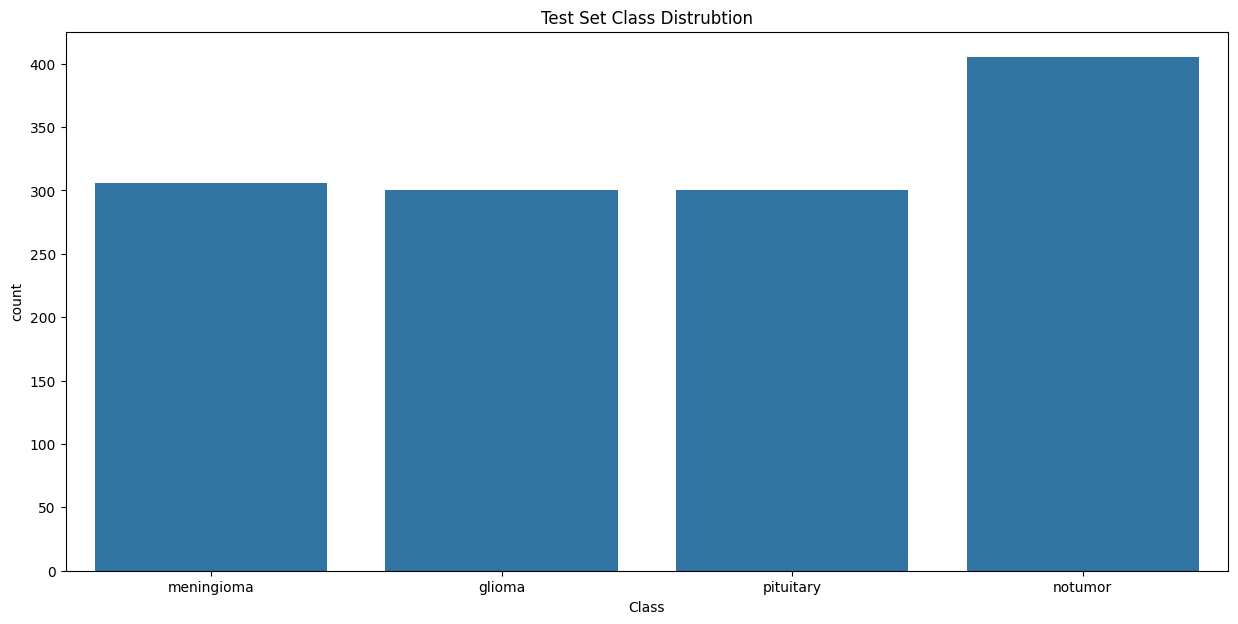

In [ ]:
plt.figure(figsize=(15,7))
plt.title('Test Set Class Distrubtion')
ax = sns.countplot(x='Class', data=ts_df)

*A fairly balanced testing set*

*notumor has slighly more instances*

# Split Test Dataset
Test set → 50%

Validation set → 50%

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Recall, Precision
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# use stratify to maintain same class proportions
valid_df, ts_df = train_test_split(ts_df, test_size=0.5, stratify=ts_df['Class'] , random_state=42)

In [ ]:
valid_df

,Class,Path
1143,notumor,/content/Testing/notumor/Te-no_0254.jpg
29,meningioma,/content/Testing/meningioma/Te-meTr_0000.jpg
1076,notumor,/content/Testing/notumor/Te-no_0193.jpg
464,glioma,/content/Testing/glioma/Te-gl_0198.jpg
291,meningioma,/content/Testing/meningioma/Te-me_0246.jpg
...,...,...
177,meningioma,/content/Testing/meningioma/Te-me_0196.jpg
433,glioma,/content/Testing/glioma/Te-gl_0207.jpg
415,glioma,/content/Testing/glioma/Te-gl_0028.jpg
1064,notumor,/content/Testing/notumor/Te-no_0310.jpg


In [ ]:
ts_df

,Class,Path
102,meningioma,/content/Testing/meningioma/Te-me_0218.jpg
50,meningioma,/content/Testing/meningioma/Te-me_0040.jpg
1266,notumor,/content/Testing/notumor/Te-no_0314.jpg
185,meningioma,/content/Testing/meningioma/Te-me_0139.jpg
346,glioma,/content/Testing/glioma/Te-gl_0124.jpg
...,...,...
978,notumor,/content/Testing/notumor/Te-no_0319.jpg
728,pituitary,/content/Testing/pituitary/Te-pi_0042.jpg
1017,notumor,/content/Testing/notumor/Te-no_0316.jpg
220,meningioma,/content/Testing/meningioma/Te-me_0203.jpg


# Standardize Images

In [ ]:
# default image size for the model
img_size = (299,299)


# rescale all pixels from 0-255 to 0-1
# assign a random brightness from 0.8-1.2 (ONLY FOR TRAINING SET)
image_generator = ImageDataGenerator(rescale=1./255, brightness_range=(0.8, 1.2))

# rescale all pixels from 0-255 to 0-1
ts_image_generator = ImageDataGenerator(rescale=1./255)

In [ ]:
# standardized training set
# batch_size = 32
tr_gen = image_generator.flow_from_dataframe(tr_df, x_col='Path',
                                             y_col='Class',
                                             batch_size=32,
                                             target_size=img_size)

# standardized validation set
# batch_size = 32
valid_gen = image_generator.flow_from_dataframe(valid_df, x_col='Path',
                                             y_col='Class',
                                             batch_size=32,
                                             target_size=img_size)

# standardized test set
# batch_size = 16
# no shuffling to maintain order of test set
ts_gen = ts_image_generator.flow_from_dataframe(ts_df, x_col='Path',
                                             y_col='Class',
                                             batch_size=16,
                                             target_size=img_size,
                                             shuffle=False)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


# Show processed images in Training set

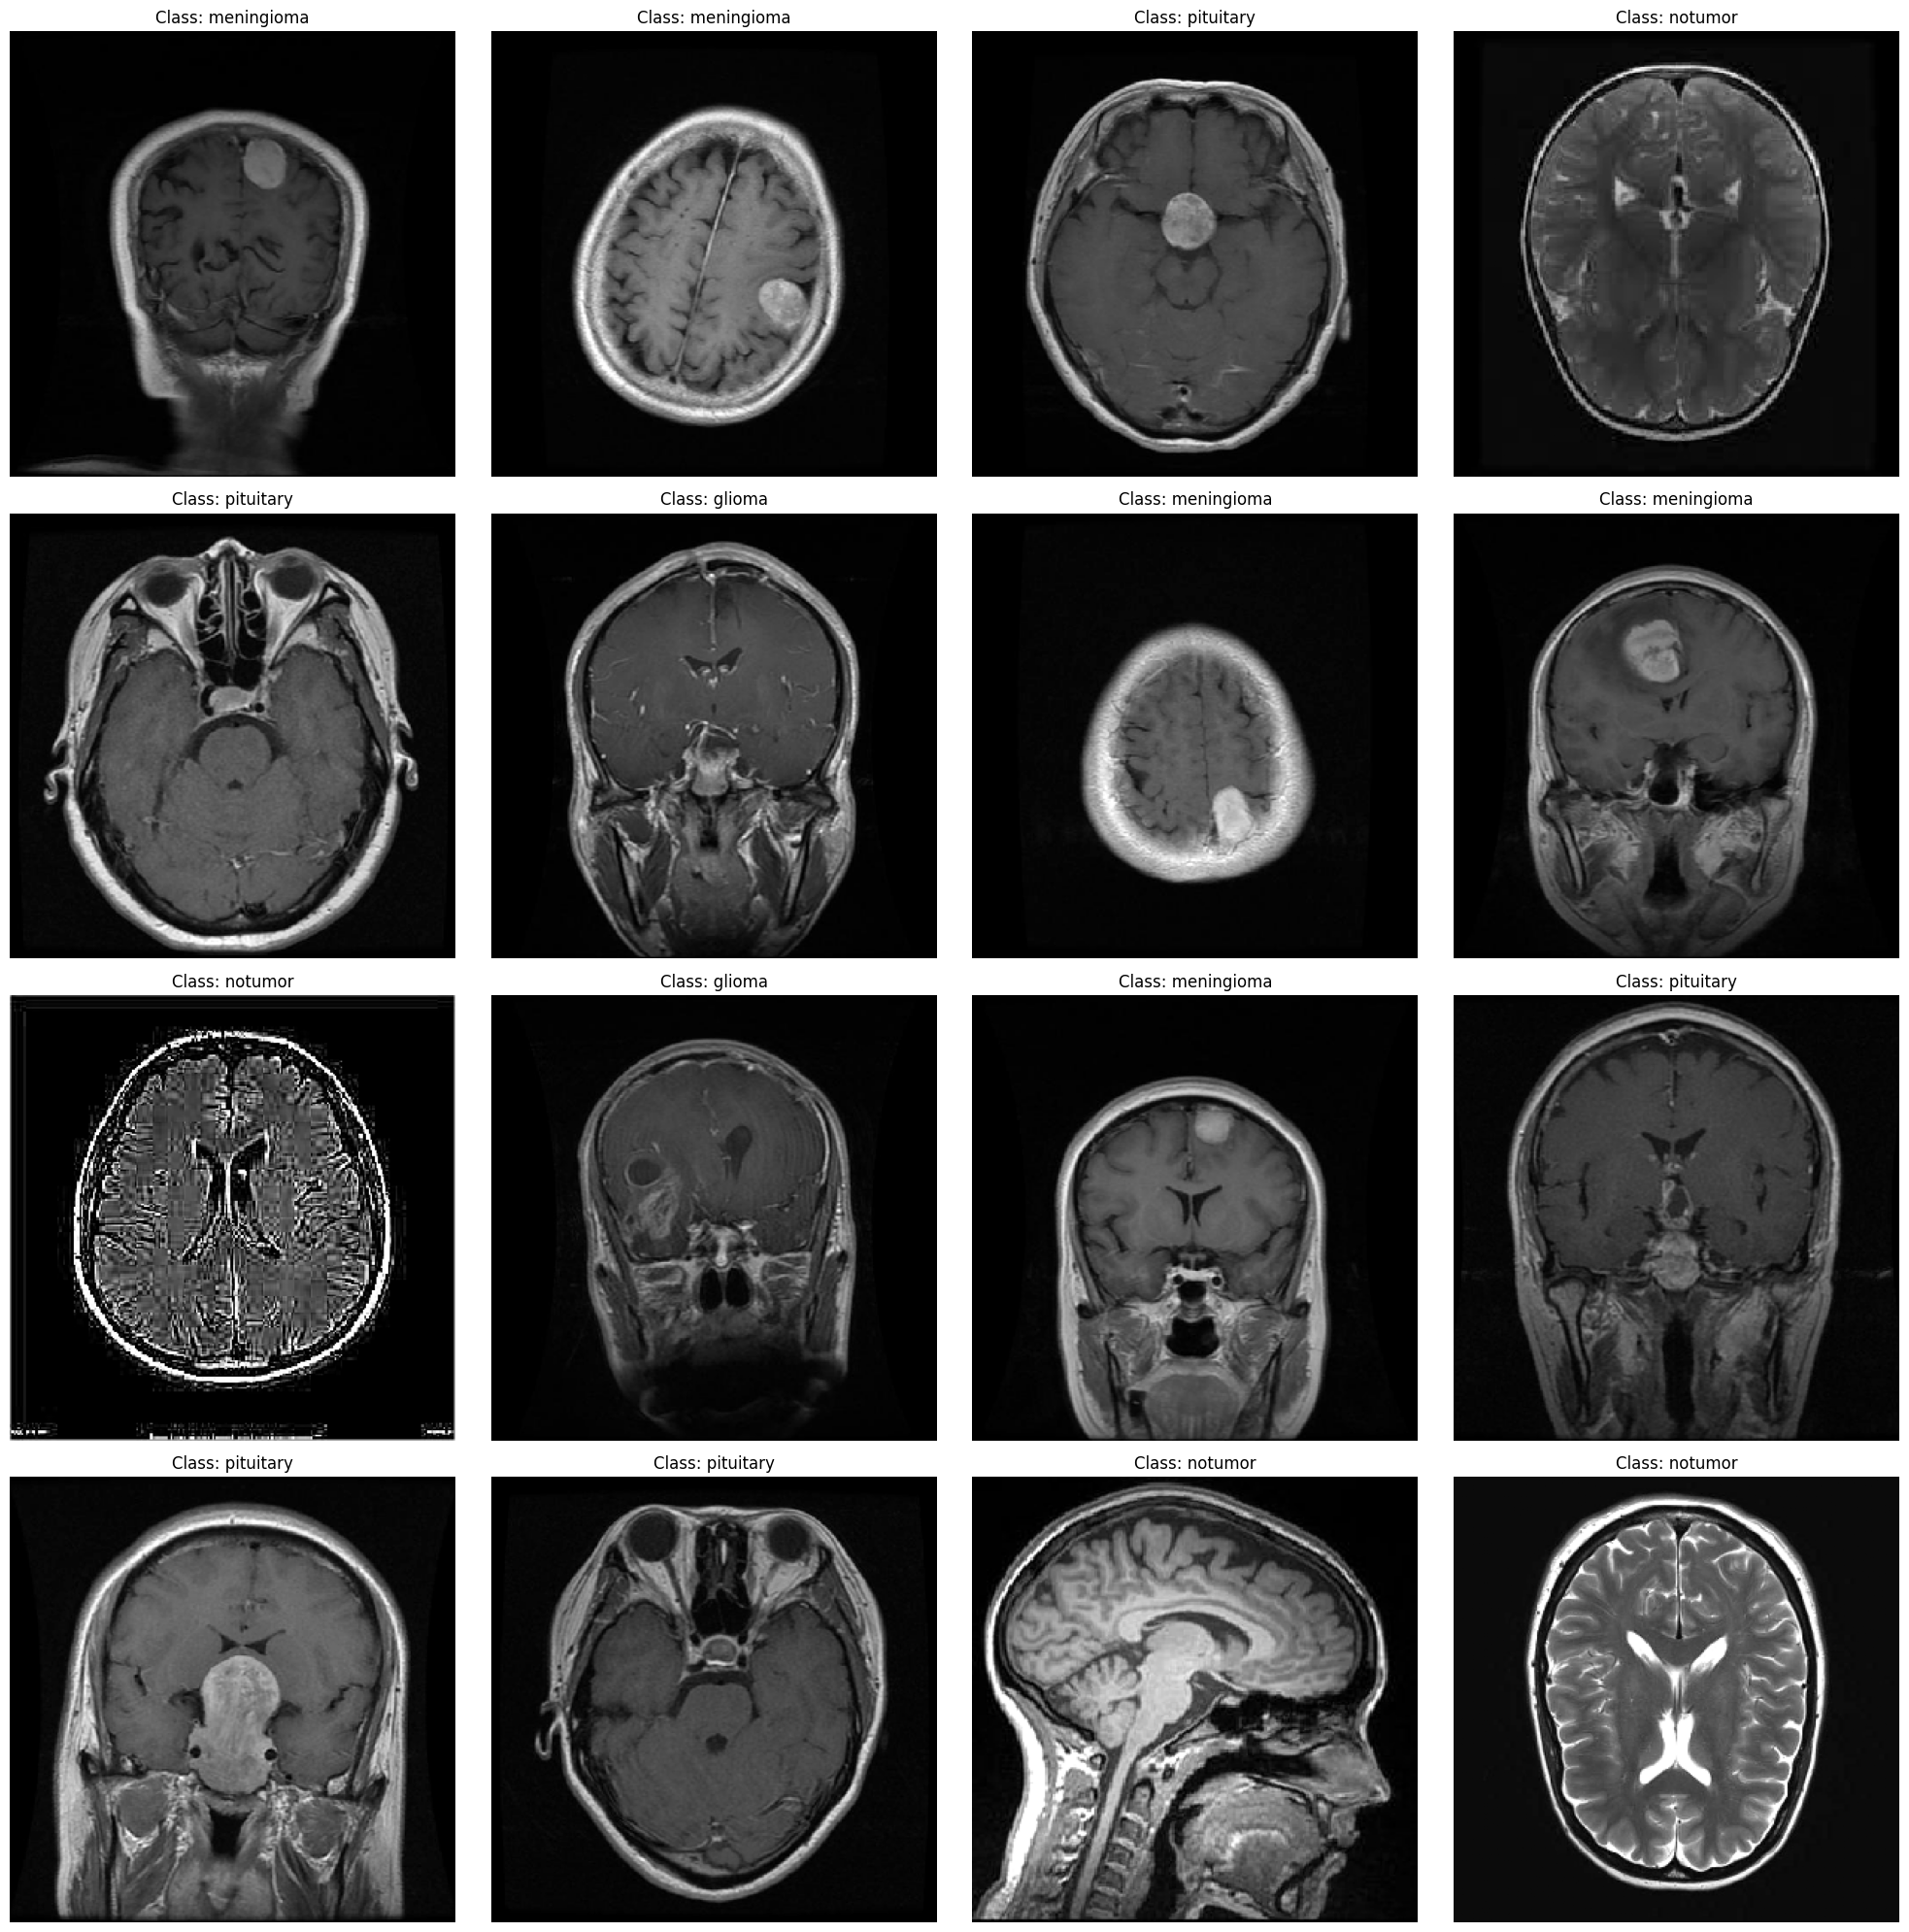

In [ ]:
# 20x20 Plot
plt.figure(figsize=(20,20))

# display 16 images
for i in range(16):
  # 4x4 Subplot for each image
  plt.subplot(4, 4, i+1)
  # get next batch from iterator
  batch = next(tr_gen)
  # retrieve image
  image = batch[0][0]
  # retrieve label
  label = batch[1][0]
  # display image
  plt.imshow(image)

  # Get class index out of a one-hot-encoded label list
  class_index = np.argmax(label)

  # Get the list of class names and indicies
  class_names = list(tr_gen.class_indices.keys())

  # Get the class name using the index position
  class_name = class_names[class_index]

  plt.title(f'Class: {class_name}')
  plt.axis('off')

plt.tight_layout()
plt.show()

# Define Our CNN Model
## Xception as base model
- Base convolution layers and pooling layers extracted from Xception model
- Exlcude the fully connetcted layers (to adjust it to our own MRI classification)
- Use pre-trained weights from training done on ImageNet

In [ ]:
base_model = tf.keras.applications.Xception(include_top=False,
                                            weights='imagenet',
                                            input_shape=(299, 299, 3),
                                            pooling='max')

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


## Add custom fully connected layers
- Flatten Layer (tensors -> 1D)
- Dropout Layer (0.3 rate)
- Dense Layer (128 units & relu)
- Dropout Layer (0.25 rate)
- Output Dense Layer (4 units for 4 classes & softmax)

In [ ]:
model = Sequential([
    base_model,
    Flatten(),
    Dropout(rate=0.3),
    Dense(128, activation='relu'),
    Dropout(rate=0.25),
    Dense(4, activation='softmax')
])

## Compile model
- Optimizer: Adamax (learning_rate = 0.001)
- Loss Function: Categorical Cross-Entropy
- Measurement Metrics:
  - Accuracy
  - Precision
  - Recall

In [ ]:
model.compile(optimizer=Adamax(0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy', Precision(), Recall()])

# Train Model

5 epochs only since we are using pre-trained weights

In [ ]:
hist = model.fit(tr_gen, epochs=5, validation_data=valid_gen)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 282s 1s/step - accuracy: 0.7610 - loss: 0.6706 - precision: 0.8285 - recall: 0.6425 - val_accuracy: 0.9115 - val_loss: 0.2705 - val_precision: 0.9299 - val_recall: 0.9115
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 152s 843ms/step - accuracy: 0.9699 - loss: 0.0735 - precision: 0.9728 - recall: 0.9689 - val_accuracy: 0.8504 - val_loss: 0.3847 - val_precision: 0.8689 - val_recall: 0.8397
Epoch 3/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 151s 840ms/step - accuracy: 0.9953 - loss: 0.0190 - precision: 0.9954 - recall: 0.9948 - val_accuracy: 0.9771 - val_loss: 0.0933 - val_precision: 0.9771 - val_recall: 0.9771
Epoch 4/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 153s 846ms/step - accuracy: 0.9945 - loss: 0.0187 - precision: 0.9947 - recall: 0.9945 - val_accuracy: 0.9847 - val_loss: 0.0739 - val_precision: 0.9847 - val_recall: 0.9847
Epoch 5/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 152s 845ms/step - accuracy: 0.9978 - loss: 0.0084 - precision: 0.9978 - recall: 0.9978 - val_accuracy: 0.9863 - val_loss: 

## Visualize Training and Validation Metrics
- Loss
- Accuracy
- Precision
- Recall

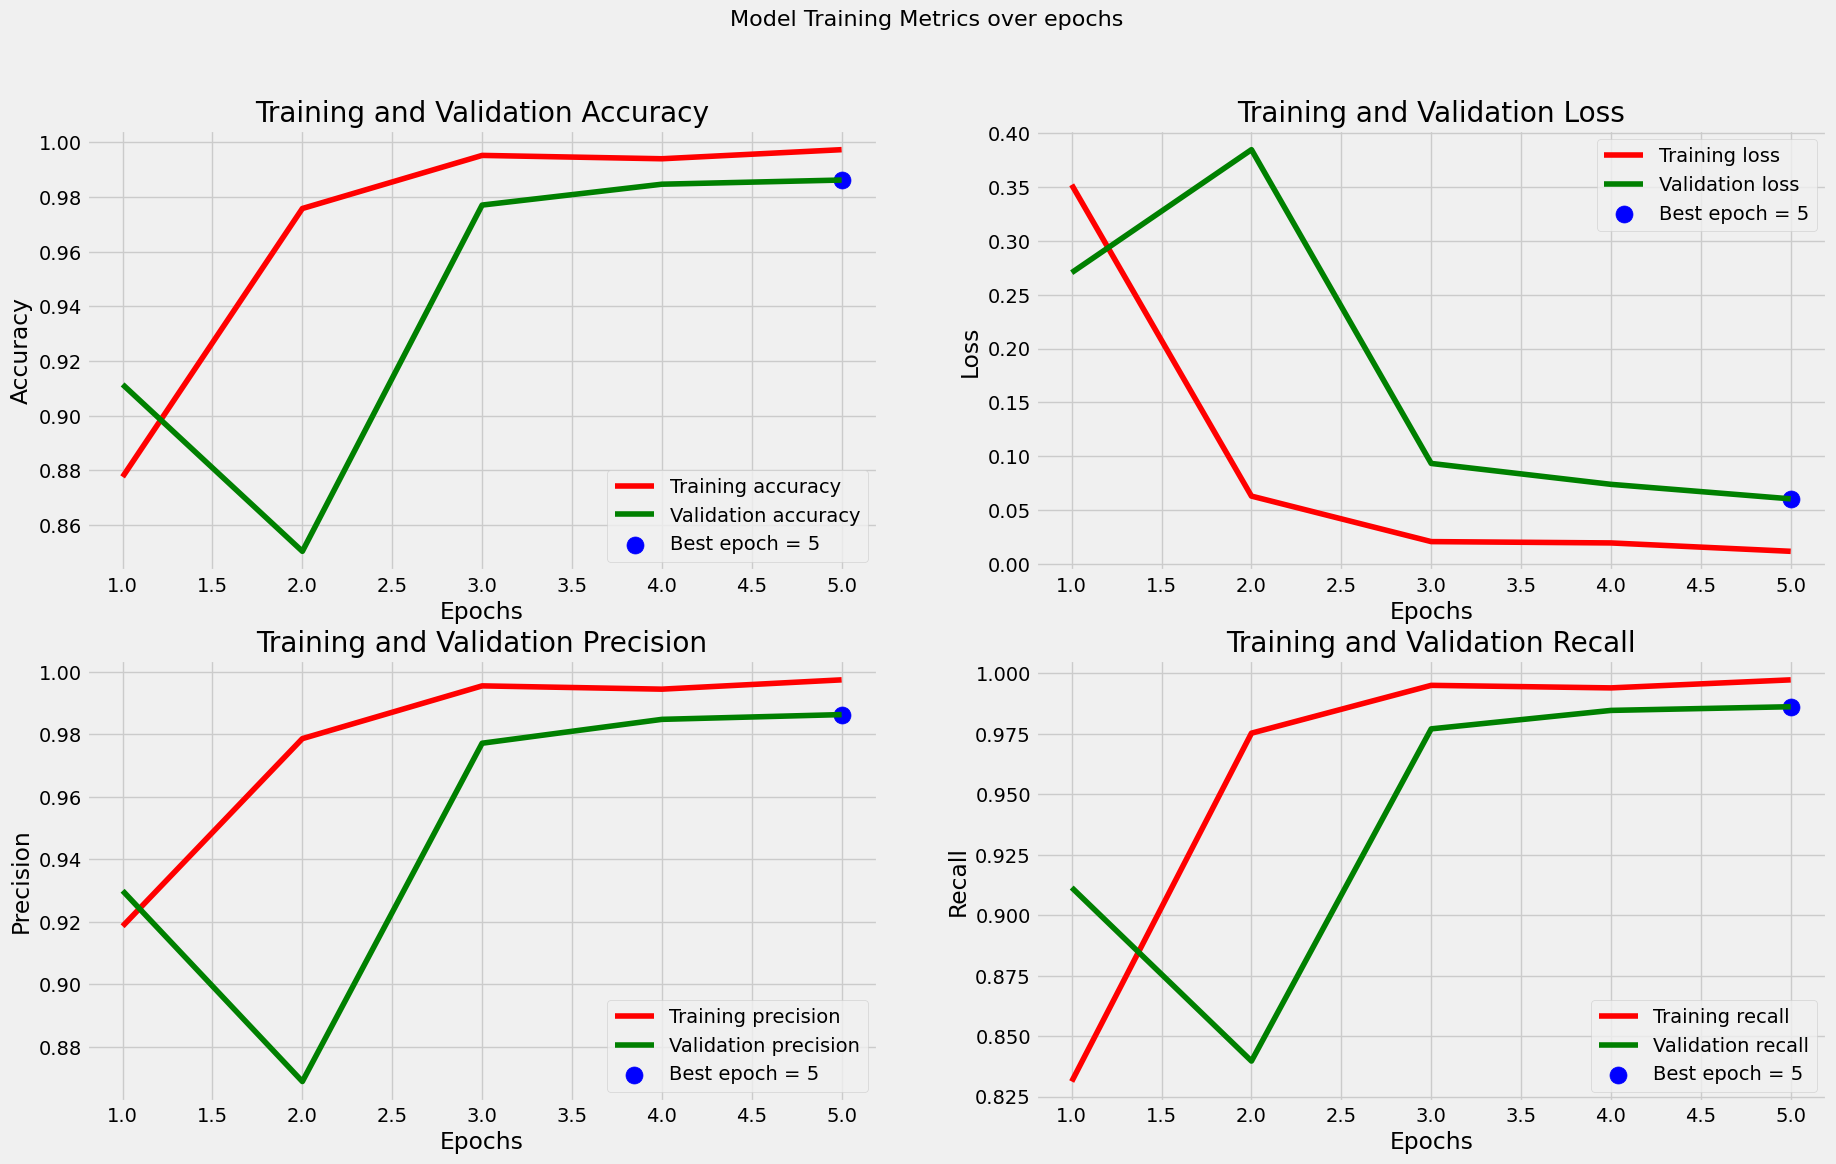

In [ ]:
# Get training and validation metrics from history
metrics = ['accuracy', 'loss', 'precision', 'recall']
tr_metrics = {m: hist.history[m] for m in metrics}
val_metrics = {m: hist.history[f'val_{m}'] for m in metrics}

# Find best epochs and values on validation set
best_epochs = {}
best_values = {}

for m in metrics:
  # less is better when it comes to loss
  if m == 'loss':
    idx = np.argmin(val_metrics[m])
  # more is better for other metrics
  else:
    idx = np.argmax(val_metrics[m])
  best_epochs[m] = idx + 1
  best_values[m] = val_metrics[m][idx]

# Plot metricies
plt.figure(figsize=(20,12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics, 1):
  plt.subplot(2, 2, i)
  epochs = range(1, len(val_metrics[metric])+ 1)

  plt.plot(epochs, tr_metrics[metric], 'r', label=f'Training {metric}')
  plt.plot(epochs, val_metrics[metric], 'g', label=f'Validation {metric}')
  plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue',
              label=f'Best epoch = {best_epochs[metric]}')

  plt.title(f'Training and Validation {metric.title()}')
  plt.xlabel('Epochs')
  plt.ylabel(metric.title())
  plt.legend()
  plt.grid(True)

plt.suptitle("Model Training Metrics over epochs", fontsize=16)
plt.show()

# Model Evaluation

In [ ]:
# evaluate performance on training set
train_score = model.evaluate(tr_gen, verbose=1)
# evaluate performance on validation set
valid_score = model.evaluate(valid_gen, verbose=1)
# evaluate performance on test set
test_score = model.evaluate(ts_gen, verbose=1)

179/179 ━━━━━━━━━━━━━━━━━━━━ 45s 251ms/step - accuracy: 0.9948 - loss: 0.0179 - precision: 0.9948 - recall: 0.9948
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 256ms/step - accuracy: 0.9882 - loss: 0.0487 - precision: 0.9882 - recall: 0.9882
 1/41 ━━━━━━━━━━━━━━━━━━━━ 6s 152ms/step - accuracy: 1.0000 - loss: 0.0087 - precision: 1.0000 - recall: 1.0000

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - accuracy: 0.9879 - loss: 0.0214 - precision: 0.9879 - recall: 0.9879


In [ ]:
print(f'Train Accuracy: {train_score[1]*100:.2f}%')
print(f'Train Loss: {train_score[0]:.4f}')

print(f'\nValid Accuracy: {valid_score[1]*100:.2f}%')
print(f'Valid Accuracy: {valid_score[0]:.4f}')

print(f'\nTest Accuracy: {test_score[1]*100:.2f}%')
print(f'Test Loss: {test_score[0]:.4f}')


Train Accuracy: 99.61%
Train Loss: 0.0157

Valid Accuracy: 98.78%
Valid Accuracy: 0.0614

Test Accuracy: 98.78%
Test Loss: 0.0264


## Visualize Model Performance


In [ ]:
# prediction probabilities on test set
preds = model.predict(ts_gen)

# extracts highest prediction out of predictions
y_pred = np.argmax(preds, axis=1)

class_dict = {
    0: 'glioma',
    1: 'meningioma',
    2: 'notumor',
    3: 'pituitary'
}

41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step


### Confusion Matrix

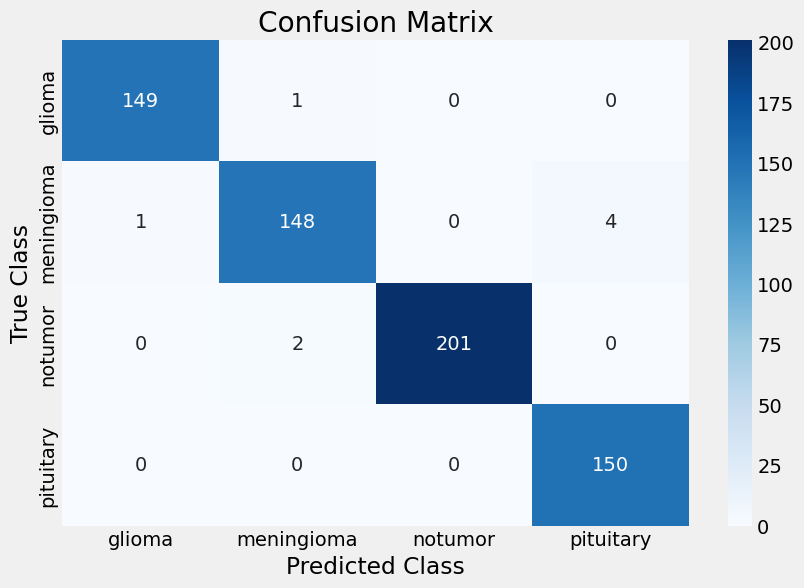

In [ ]:
# Display Confusion Matrix
cm = confusion_matrix(ts_gen.classes, y_pred)
# map predictions to labels
labels = list(class_dict.values())
plt.figure(figsize=(9,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.yticks(rotation=90)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

### Visualize Prediction Probabilities


In [ ]:
from PIL import Image

def predict(img_path:str) -> None:
  # Get class labels
  labels = list(class_dict.values())

  # Create figure
  plt.figure(figsize=(12,6))

  # Load and preprocess image
  img = Image.open(img_path)
  resized_img = img.resize((299,299))
  img_array = np.asarray(resized_img)
  img_array = np.expand_dims(img_array, axis=0) / 255.0

  # Get model predictions
  predictions = model.predict(img_array)
  probabilities = list(predictions[0])

  # Get predicted classes
  predicted_class_idx = np.argmax(probabilities)
  predicted_class = class_dict[predicted_class_idx]

  # Plot original image
  plt.subplot(1, 2, 1)
  plt.imshow(resized_img)
  plt.title(f"Input MRI Image\nPredicted: {predicted_class}")

  # Plot prediction probabilities
  plt.subplot(1, 2, 2)
  bars = plt.barh(labels, probabilities)
  plt.xlabel("Probability", fontsize=15)
  plt.title("Class Probabilities")

  # Add probability labels to bars
  ax = plt.gca()
  ax.bar_label(bars, fmt='%.2f')

  plt.tight_layout()
  plt.show()

  print(f"\nPredicted tumor type: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


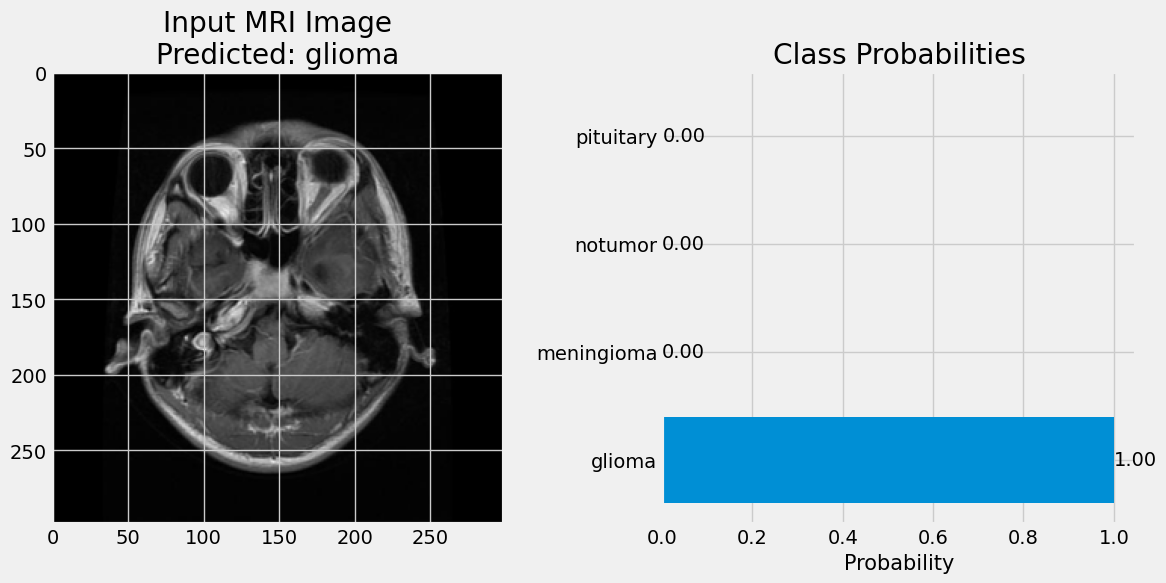


Predicted tumor type: glioma


In [ ]:
predict('/content/Testing/glioma/Te-glTr_0003.jpg')

# Save Model

In [ ]:
model.save_weights("xception_model.weights.h5")

# Define another custom CNN model
Even though the Xception model performs exceptionally, It is computationally expensive.

Therefore, I will be creating a simpler CNN model that can achieve a similar accuracy

Xception:
- ~ 21 million parameters (~ 84MB)
- needs advanced GPUs: T4, V100, A100
- High latency

Custom CNN:
- ~ 5 million parameters (~ 19MB)
- can run on simpler GPUs: GTX1650, GTX 1660, RTX 2060, T4
- Low latency


In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras import regularizers

## New dataset with simpler image processing

Some parameters will be reduced such as batch size and image size to reduce required memory.

In [ ]:
# reduced default image size to 224 x 224
img_size = (224,224)


# rescale all pixels from 0-255 to 0-1
# assign a random brightness from 0.8-1.2 (ONLY FOR TRAINING SET)
image_generator = ImageDataGenerator(rescale=1./255, brightness_range=(0.8, 1.2))

# rescale all pixels from 0-255 to 0-1
ts_image_generator = ImageDataGenerator(rescale=1./255)

# standardized training set
# reduced batch_size to 16
tr_gen = image_generator.flow_from_dataframe(tr_df, x_col='Path',
                                             y_col='Class',
                                             batch_size=16,
                                             target_size=img_size)

# standardized validation set
# reduced batch_size to 316
valid_gen = image_generator.flow_from_dataframe(valid_df, x_col='Path',
                                             y_col='Class',
                                             batch_size=16,
                                             target_size=img_size)

# standardized test set
# batch_size = 16
# no shuffling to maintain order of test set
ts_gen = ts_image_generator.flow_from_dataframe(ts_df, x_col='Path',
                                             y_col='Class',
                                             batch_size=16,
                                             target_size=img_size,
                                             shuffle=False)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


## CNN model architecture

In [ ]:
# Create a Sequential model
cnn_model = Sequential()

## Convolutional Block 1

# conv layer with 512 filters
cnn_model.add(Conv2D(512, (3, 3), padding='same', activation='relu', input_shape=(224,224, 3)))
cnn_model.add(BatchNormalization())
# max pooling layer
cnn_model.add(MaxPooling2D((2, 2)))

## Convolutional Block 2

# conv layer with 256 filters
cnn_model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
cnn_model.add(BatchNormalization())
# max pooling layer
cnn_model.add(MaxPooling2D((2, 2)))
# drop 25% of units
cnn_model.add(Dropout(0.25))

## Convolutional Block 3

# conv layer with 128 filters
cnn_model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
cnn_model.add(BatchNormalization())
# max pooling layer
cnn_model.add(MaxPooling2D((2, 2)))
# drop 25% of units
cnn_model.add(Dropout(0.25))

## Convolutional Block 4

# conv layer with 64 filters
cnn_model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
cnn_model.add(BatchNormalization())
# max pooling layer
cnn_model.add(MaxPooling2D((2, 2)))

## Fully connected layers

# Flatten Layer to 1D
cnn_model.add(Flatten())


# Dense layer 1
cnn_model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
# drop 35% of units
cnn_model.add(Dropout(0.35))
# Output dense layer
cnn_model.add(Dense(4, activation='softmax'))

# compile model
cnn_model.compile(Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy', 'precision', 'recall'])

# show model summary
cnn_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 224, 224, 512)       │          14,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 224, 224, 512)       │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 112, 112, 512)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 112, 112, 256)       │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 112, 112, 256)       │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 112, 112, 256)       │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 112, 112, 256)       │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 56, 56, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 56, 56, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_20               │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 28, 28, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_21               │ (None, 28, 28, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 5,555,844 (21.19 MB)

 Trainable params: 5,553,028 (21.18 MB)

 Non-trainable params: 2,816 (11.00 KB)

# Train CNN model

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)


cnn_hist = cnn_model.fit(tr_gen, epochs=20, validation_data=valid_gen, callbacks=[early_stopping, lr_scheduler])

Epoch 1/20
357/357 ━━━━━━━━━━━━━━━━━━━━ 189s 472ms/step - accuracy: 0.6343 - loss: 5.9234 - precision: 0.6646 - recall: 0.5884 - val_accuracy: 0.3511 - val_loss: 4.5517 - val_precision: 0.4286 - val_recall: 0.2290 - learning_rate: 0.0010
Epoch 2/20
133/357 ━━━━━━━━━━━━━━━━━━━━ 1:38 441ms/step - accuracy: 0.8265 - loss: 3.2052 - precision: 0.8438 - recall: 0.8016

## Visualize CNN metrics while training

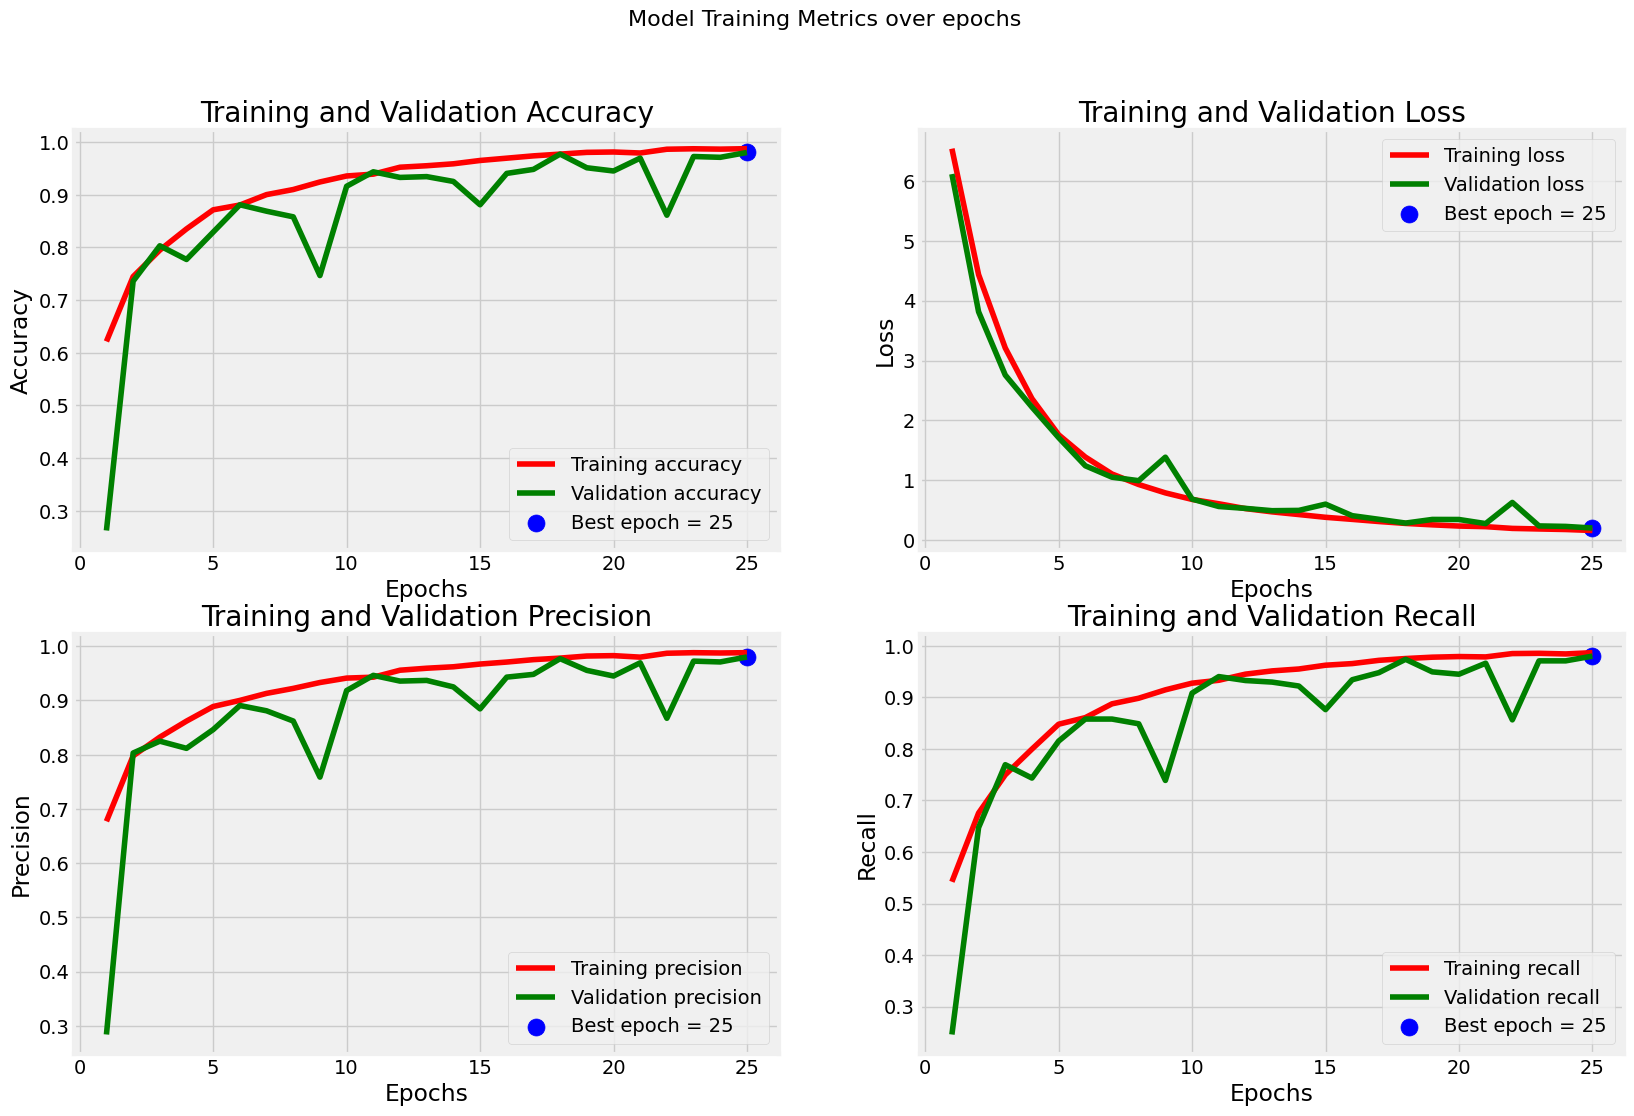

In [ ]:
# Get training and validation metrics from history
metrics = ['accuracy', 'loss', 'precision', 'recall']
tr_metrics = {m: cnn_hist.history[m] for m in metrics}
val_metrics = {m: cnn_hist.history[f'val_{m}'] for m in metrics}

# Find best epochs and values on validation set
best_epochs = {}
best_values = {}

for m in metrics:
  # less is better when it comes to loss
  if m == 'loss':
    idx = np.argmin(val_metrics[m])
  # more is better for other metrics
  else:
    idx = np.argmax(val_metrics[m])
  best_epochs[m] = idx + 1
  best_values[m] = val_metrics[m][idx]

# Plot metricies
plt.figure(figsize=(20,12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics, 1):
  plt.subplot(2, 2, i)
  epochs = range(1, len(val_metrics[metric])+ 1)

  plt.plot(epochs, tr_metrics[metric], 'r', label=f'Training {metric}')
  plt.plot(epochs, val_metrics[metric], 'g', label=f'Validation {metric}')
  plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue',
              label=f'Best epoch = {best_epochs[metric]}')

  plt.title(f'Training and Validation {metric.title()}')
  plt.xlabel('Epochs')
  plt.ylabel(metric.title())
  plt.legend()
  plt.grid(True)

plt.suptitle("Model Training Metrics over epochs", fontsize=16)
plt.show()

# CNN Model Evaluation

In [ ]:
# evaluate performance on training set
cnn_train_score = cnn_model.evaluate(tr_gen, verbose=1)
# evaluate performance on validation set
cnn_valid_score = cnn_model.evaluate(valid_gen, verbose=1)
# evaluate performance on test set
cnn_test_score = cnn_model.evaluate(ts_gen, verbose=1)

357/357 ━━━━━━━━━━━━━━━━━━━━ 27s 77ms/step - accuracy: 0.9987 - loss: 0.1387 - precision: 0.9987 - recall: 0.9981
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - accuracy: 0.9799 - loss: 0.2234 - precision: 0.9798 - recall: 0.9785
 2/41 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 1.0000 - loss: 0.1441 - precision: 1.0000 - recall: 1.0000 

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - accuracy: 0.9736 - loss: 0.2035 - precision: 0.9736 - recall: 0.9736


In [ ]:
print(f'Train Accuracy: {cnn_train_score[1]*100:.2f}%')
print(f'Train Loss: {cnn_train_score[0]:.4f}')

print(f'\nValid Accuracy: {cnn_valid_score[1]*100:.2f}%')
print(f'Valid Accuracy: {cnn_valid_score[0]:.4f}')

print(f'\nTest Accuracy: {cnn_test_score[1]*100:.2f}%')
print(f'Test Loss: {cnn_test_score[0]:.4f}')

Train Accuracy: 99.79%
Train Loss: 0.1389

Valid Accuracy: 98.17%
Valid Accuracy: 0.2084

Test Accuracy: 97.71%
Test Loss: 0.1917


## Visualize CNN Model Performance

In [ ]:
# prediction probabilities on test set
preds = cnn_model.predict(ts_gen)

# extracts highest prediction out of predictions
y_pred = np.argmax(preds, axis=1)

class_dict = {
    0: 'glioma',
    1: 'meningioma',
    2: 'notumor',
    3: 'pituitary'
}

41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step


### Confusion Matrix

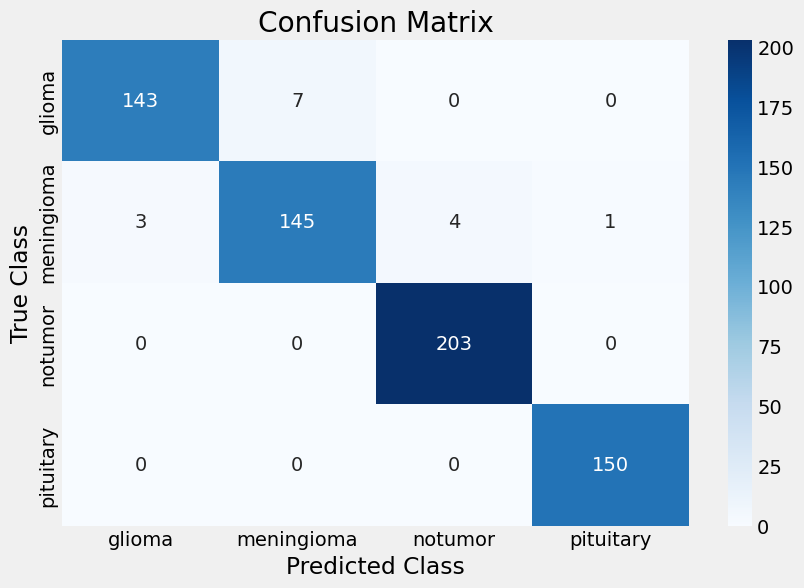

In [ ]:
# Display Confusion Matrix
cm = confusion_matrix(ts_gen.classes, y_pred)
# map predictions to labels
labels = list(class_dict.values())
plt.figure(figsize=(9,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.yticks(rotation=90)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

#### Classification Report

In [ ]:
clr = classification_report(ts_gen.classes, y_pred, target_names=labels)
print(clr)

              precision    recall  f1-score   support

      glioma       0.98      0.95      0.97       150
  meningioma       0.95      0.95      0.95       153
     notumor       0.98      1.00      0.99       203
   pituitary       0.99      1.00      1.00       150

    accuracy                           0.98       656
   macro avg       0.98      0.98      0.98       656
weighted avg       0.98      0.98      0.98       656



### Prediction Probabilties

In [ ]:
from PIL import Image

def cnn_predict(img_path:str) -> None:
  # Get class labels
  labels = list(class_dict.values())

  # Create figure
  plt.figure(figsize=(12,6))

  # Load and preprocess image
  img = Image.open(img_path)
  resized_img = img.resize((224,224))
  img_array = np.asarray(resized_img)
  img_array = np.expand_dims(img_array, axis=0) / 255.0

  # Get model predictions
  predictions = cnn_model.predict(img_array)
  probabilities = list(predictions[0])

  # Get predicted classes
  predicted_class_idx = np.argmax(probabilities)
  predicted_class = class_dict[predicted_class_idx]

  # Plot original image
  plt.subplot(1, 2, 1)
  plt.imshow(resized_img)
  plt.title(f"Input MRI Image\nPredicted: {predicted_class}")

  # Plot prediction probabilities
  plt.subplot(1, 2, 2)
  bars = plt.barh(labels, probabilities)
  plt.xlabel("Probability", fontsize=15)
  plt.title("Class Probabilities")

  # Add probability labels to bars
  ax = plt.gca()
  ax.bar_label(bars, fmt='%.2f')

  plt.tight_layout()
  plt.show()

  print(f"\nPredicted tumor type: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


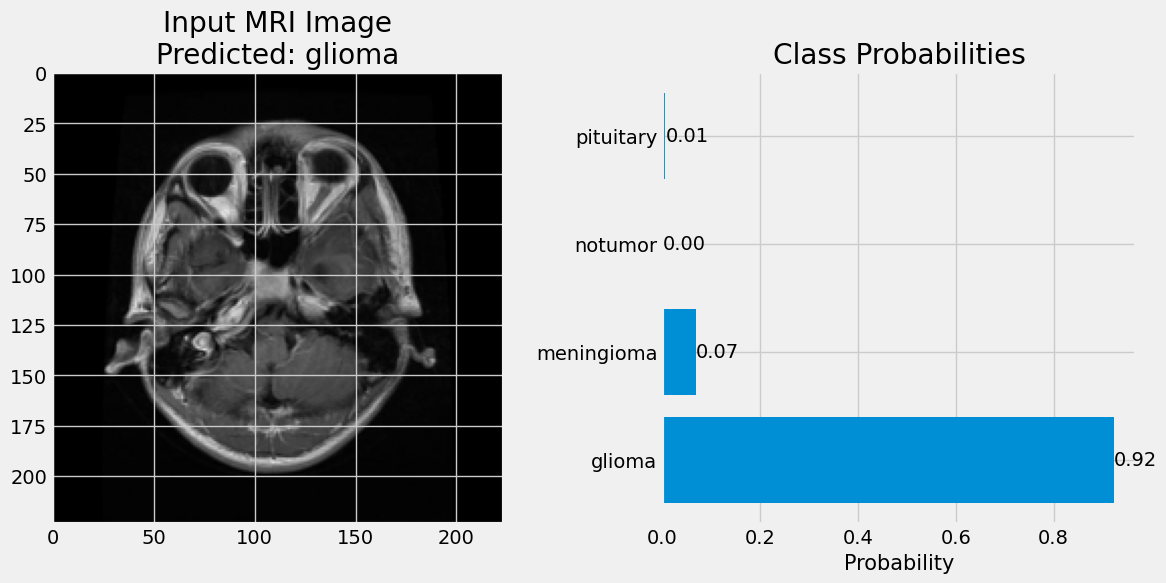


Predicted tumor type: glioma


In [ ]:
cnn_predict('/content/Testing/glioma/Te-glTr_0003.jpg')

# Save CNN Model

In [ ]:
cnn_model.save('cnn_model2.h5')